**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Eduardo Selim Martínez Mayorga
*   MATRÍCULA: A01795167

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Estoy trabajando en mi local, no en Google Colab

In [2]:
# El archivo "responses.csv" se encuentra en la misma
# carpeta que este Jupyter Notebook

response_df = pd.read_csv('responses.csv')

# Se verifica la lectura y definición del dataframe
response_df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [3]:
# Se verifica el número de renglones y columnas del dataframe
response_df.shape

(1010, 150)

Se puede observar que el dataframe tiene 1,010 renglones y 150 columnas

In [4]:
# Se aplica el método info()
response_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


Dado que el número de columnas es grande, el método info() no es suficiente, pues no imprime lo solicitado. Intentemos con la función `dtypes`, que nos dice el tipo de dato que tiene cada columna

In [5]:
response_df.dtypes

Music                       float64
Slow songs or fast songs    float64
Dance                       float64
Folk                        float64
Country                     float64
                             ...   
Left - right handed          object
Education                    object
Only child                   object
Village - town               object
House - block of flats       object
Length: 150, dtype: object

De nuevo, las propiedades de auto-impresión del método `dtypes` no son suficientes para el número de columnas que se tienen. Por eso es más sencillo trabajar con dataframes

In [6]:
# Guardamos la serie en un objeto
x = response_df.dtypes

# Convertimos la serie guardada en un dataframe
df_columnas = x.apply(pd.Series)

# Se convierte el índice en un columna y se toma a los índices
# como los números naturales
df_columnas.reset_index(inplace=True)

#Cambiamos el nombre de las columnas para mayor entendimiento
df_columnas.columns = ['variable', 'tipo']

# Ahora sí se puede contar cuántas columnas hay de cada tipo
df_columnas['tipo'].value_counts()

float64    134
object      11
int64        5
Name: tipo, dtype: int64

Esto significa que hay

+ 134 variables del tipo `float64` (i.e. que toman valores reales)
+ 5 variables del tipo `int64` (i.e. que toman valores enteros)
+ 11 variables del tipo `object` (i.e. que toman valores strings)

In [7]:
# Se obtienen conteos, número de valores únicos, moda y
# y su frecuencia para las variables no numéricas
response_df.describe(include = 'object')

,Smoking,Alcohol,Punctuality,Lying,Internet usage,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
count,1002,1005,1008,1008,1010,1004,1007,1009,1008,1006,1006
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,430,659,399,549,744,593,906,621,754,707,595


In [8]:
# Se obtienen media, desviación estándar, máximo, mínimo
# y los 3 cuartiles para las variables numéricas
response_df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


In [9]:
# Veamos qué tipo de dato es la variable 'Weight'
response_df['Weight'].dtype

dtype('float64')

In [10]:
# Veamos algunas de sus estadísticas descriptivas
response_df['Weight'].describe()

count    990.000000
mean      66.405051
std       13.839561
min       41.000000
25%       55.000000
50%       64.000000
75%       75.000000
max      165.000000
Name: Weight, dtype: float64

Se puede observar que es del tipo `float64` i.e. numérica real. Además, el rango de valores que toma sugiere que toma muchos valores, quitando elementos para considerarla como variable que toma valores enteros. Adicionalmente, la escala es de razón (pues el cero representa la ausiencia del atributo). Por tanto conviene hacer un histograma

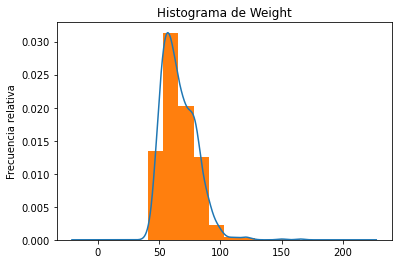

In [11]:
# Hacemos el histograma
fig, ax = plt.subplots()
response_df['Weight'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de Weight')
response_df['Weight'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [12]:
# Se calculará el coeficiente de asimetría
response_df['Weight'].skew()

1.2237251927527477

Como este número es positivo, se dice que la la distribución de esta variable es asimétrica positiva o a la derecha. Hecho que también es soportado por la relación de orden entre su media y su mediana que se vió en la pregunta 2.

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?

Para obtener el número de valores faltantes:

In [13]:
response_df['Weight'].isna().sum()

20

Es decir que hay 20 valores faltantes en la variable `Weight`. 

Para obtener la proporción, se requiere el número de filas del dataframe en esa variable:

In [14]:
(response_df['Weight'].isna().sum())/len(response_df['Weight'])

0.019801980198019802

Es decir, que hay a penas aproximadamente un 2% de valores faltantes en la variable `Weight`

5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

Utilizaré las funciones recomendadas `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical`

In [15]:
# carga del módulo scipy.stats la función para la prueba t
from scipy.stats import ttest_ind

"""
input:
+ df: dataframe completo donde debe estar la variables con NAs
y la variable con la que se quiere analizar la relación
+ str_att_name: String con el nombre de la variable numérica con 
la que se quiere analizar la relación
+ BM_MV: Serie de pandas con valores booleanos donde se indica si
el renglón correspondiente tiene NA ó no

output:
Objeto tipo impresión con gráficas, una con dos histogramas
de la variable de interés dividida con ocurrencia de NAs de la otra
variable. La otra gráfica consiste de dos boxplots de la variable 
de interés dividida con ocurrencia de NAs de la otra variable.
Finalmente el p-value de la prueba t. La prueba t para las medias 
de dos muestras independientes. La hipótesis nula es que las dos 
muestras independientes tiene la mismas medias; si este p-valor
es menor que  0.95 se rechazan la hipótesis nula, i.e. las muestras
no tienen la misma media y por tanto no se consideran muestras 
comparables.
"""
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [16]:
# carga del módulo scipy.stats la función para la prueba ji-cuadrada
from scipy.stats import chi2_contingency

"""
input:
+ df: dataframe completo donde debe estar la variables con NAs
y la variable con la que se quiere analizar la relación
+ str_att_name: String con el nombre de la variable categórica con 
la que se quiere analizar la relación
+ BM_MV: Serie de pandas con valores booleanos donde se indica si
el renglón correspondiente tiene NA ó no

output:
Objeto tipo impresión con una gráfica con dos gráficas de barras
de la variable de interés dividida con ocurrencia de NAs de la otra
variable.
Finalmente el p-value de la prueba ji-cuadrada.
La prueba ji-cuadrada de independencia de variables en una tabla 
de contingencia. Se basa en la comparación de frecuencias esperadas
(bajo la hipótesis de independencia) y frecuencias observadas a 
partir de una tabla de contingencia (nombre rimbonbante para 
conteos segmentados por dos variables categóricas)
La hipótesis nula se rechaza si el p-value es menor a 0.95
i.e. las muestras no tienen las mismas frecuencias y por tanto 
no se consideran muestras comparables.
"""
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

### Relación de las variables 'Weight' y 'Age'

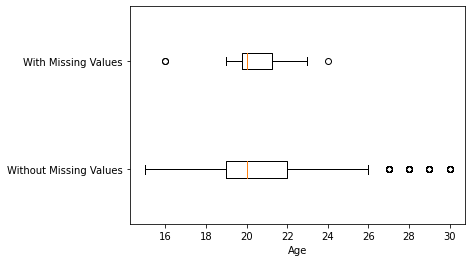

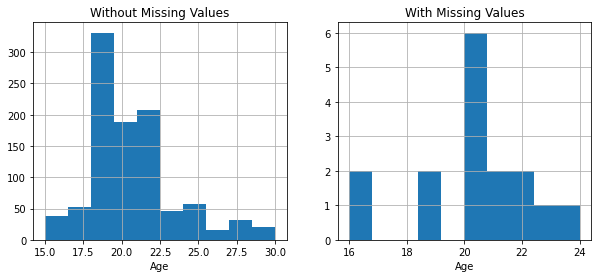

p-value of t-test: 0.7258243979822129


In [17]:
# Se obtiene la lista de booleanos para identificar NaNs
BM_MV = response_df['Weight'].isna()

# Se aplica la función 'Diagnose_MV_Numerical'
Diagnose_MV_Numerical(response_df,'Age',BM_MV)

Se puede observar que la forma de ambos histogramas y ambos boxplots para la variable `Age` son diferentes. Es decir, la ocurrencia de NaN en la variable `Weight` modifica la forma de las muestras. Por tanto los valores de `Age` NO son independientes de la ocurrencia de NaN en la variable `Weight`. Esto lo confirma formalmente el p-valor de la prueba t, que es menor que .95

### Relación de las variables 'Weight' y 'Number of siblings'

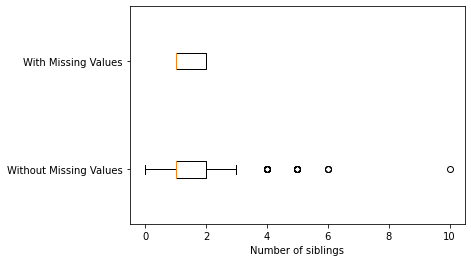

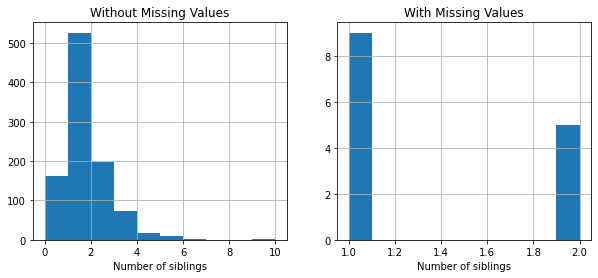

p-value of t-test: 0.8255092107556896


In [18]:
# Se obtiene la lista de booleanos para identificar NaNs
BM_MV = response_df['Weight'].isna()

# Se aplica la función 'Diagnose_MV_Numerical'
Diagnose_MV_Numerical(response_df,'Number of siblings',BM_MV)

Se puede observar que la forma de ambos histogramas y ambos boxplots para la variable `Number of siblings` son muy diferentes. Es decir, la ocurrencia de NaN en la variable `Weight` modifica la forma de las muestras. Por tanto los valores de `Number of siblings` NO son independientes de la ocurrencia de NaN en la variable `Weight`. Esto lo confirma formalmente el p-valor de la prueba t, que es menor que .95

### Relación de las variables 'Weight' y 'Gender'

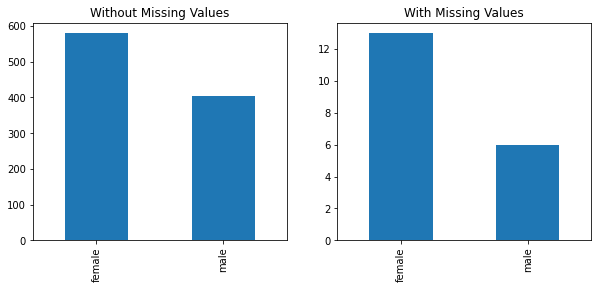

p-value of Chi_squared test: 0.5472167199163878


In [19]:
# Se obtiene la lista de booleanos para identificar NaNs
BM_MV = response_df['Weight'].isna()

# Se aplica la función 'Diagnose_MV_Categorical'
Diagnose_MV_Categorical(response_df,'Gender',BM_MV)

Se puede observar que la forma de ambas gráficas de barras para la variable `Gender` son diferentes. La proporición de hombres v.s. mujeres en ambas gráficas también parace diferente. Es decir, la ocurrencia de NaN en la variable `Weight` modifica la forma de las muestras. Por tanto los valores de `Gender` NO son independientes de la ocurrencia de NaN en la variable `Weight`. Esto lo confirma formalmente el p-valor de la prueba ji-cuadrada, que es menor que 0.95

### Relación de las variables 'Weight' y 'Education'

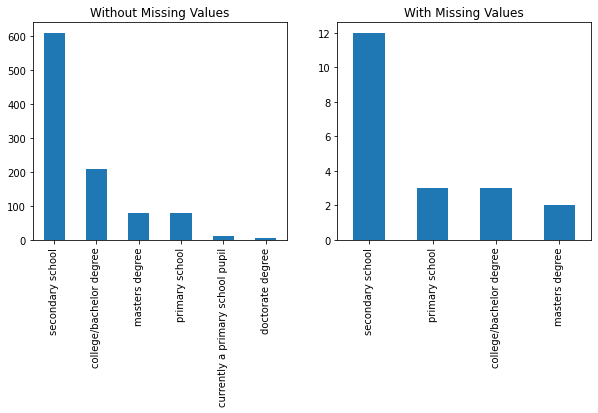

p-value of Chi_squared test: 0.8424822989541867


In [20]:
# Se obtiene la lista de booleanos para identificar NaNs
BM_MV = response_df['Weight'].isna()

# Se aplica la función 'Diagnose_MV_Categorical'
Diagnose_MV_Categorical(response_df,'Education',BM_MV)

Se puede observar que la forma de ambas gráficas de barras para la variable `Education` son diferentes. Incluso cuando ocurren NaNs en la variable `Weight` desaparecen algunas de las categorías de la variable `Educaction`. Es decir, la ocurrencia de NaN en la variable `Weight` modifica la forma de las muestras. Por tanto los valores de `Education` NO son independientes de la ocurrencia de NaN en la variable `Weight`. Esto lo confirma formalmente el p-valor de la prueba ji-cuadrada, que es menor que 0.95

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

Ya se dijo que hay 20 valores faltantes en la variable `Weight`. A saber,

In [21]:
response_df['Weight'].isna().sum()

20

In [22]:
# Algunos de sus descriptivos se ven como
response_df['Weight'].describe()

count    990.000000
mean      66.405051
std       13.839561
min       41.000000
25%       55.000000
50%       64.000000
75%       75.000000
max      165.000000
Name: Weight, dtype: float64

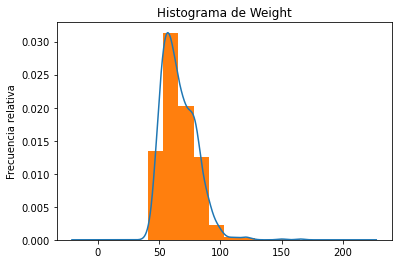

In [23]:
# Su histograma se ve de esta forma
fig, ax = plt.subplots()
response_df['Weight'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de Weight')
response_df['Weight'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

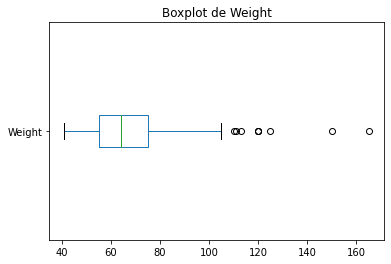

In [24]:
# El boxplot de 'Weight' se ve de la forma
response_df['Weight'].plot(kind='box',
                      title='Boxplot de Weight',
                      vert=False);

Para una variable con este nivel de asimetría y outliers se sugiere hacer una inputación de valores a partir de la mediana y no a partir de la media (ambas son medidas de tendencia central). Por esta razón se hará la imputación de los valores faltantes a partir de la mediana.

In [25]:
# Se calcula la mediana
mediana = response_df['Weight'].median()
mediana

64.0

In [26]:
# Se obtiene el booleano para saber si el valor es NaN
condicion = response_df['Weight'].isna()

# Se imprimen dichos renglones con NaN en 'Weight'
response_df[condicion]['Weight']

137   NaN
142   NaN
164   NaN
209   NaN
276   NaN
405   NaN
453   NaN
495   NaN
509   NaN
551   NaN
558   NaN
646   NaN
703   NaN
712   NaN
790   NaN
842   NaN
875   NaN
889   NaN
902   NaN
960   NaN
Name: Weight, dtype: float64

Efectivamente son 20 los valores faltantes, a saber

In [27]:
len(response_df[condicion])

20

In [28]:
# Se obtienen los índices de los renglones con valor de NaN
# en la variable 'Weight'
indices_na_weight = response_df[condicion]['Weight'].index
indices_na_weight

Int64Index([137, 142, 164, 209, 276, 405, 453, 495, 509, 551, 558, 646, 703,
            712, 790, 842, 875, 889, 902, 960],
           dtype='int64')

In [29]:
# Se observa que efectivamente son NaN
response_df.loc[indices_na_weight, ['Weight']]

,Weight
137,NaN
142,NaN
164,NaN
209,NaN
276,NaN
405,NaN
453,NaN
495,NaN
509,NaN
551,NaN


In [30]:
# Se sustituye en valor por la mediana
response_df.loc[indices_na_weight, ['Weight']] = mediana

In [31]:
# Se verifica la inputación
response_df.loc[indices_na_weight, ['Weight']]

,Weight
137,64.0
142,64.0
164,64.0
209,64.0
276,64.0
405,64.0
453,64.0
495,64.0
509,64.0
551,64.0


In [32]:
# Se obtiene de nuevo el número de NaN para la varible 'Weight'
response_df['Weight'].isna().sum()

0

Que efectivimente es 0 :)

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

In [33]:
# Como antes, se obtiene algunas estadísticas descriptivas de la
# variable 'Weight'
response_df['Weight'].describe()

count    1010.000000
mean       66.357426
std        13.705814
min        41.000000
25%        56.000000
50%        64.000000
75%        75.000000
max       165.000000
Name: Weight, dtype: float64

Se puede ver que la distancia entre el mínimo y el primer cuartil y la distancia entre el máximo y el tercer cuartil son muy diferentes. La media y la mediana no parecen muy diferentes, por tanto se realizarán histogramas y boxplot para verificar la presencia de outliers.

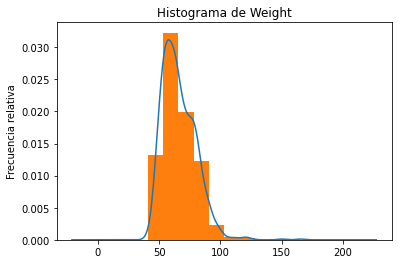

In [34]:
# Hacemos el histograma
fig, ax = plt.subplots()
response_df['Weight'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de Weight')
response_df['Weight'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

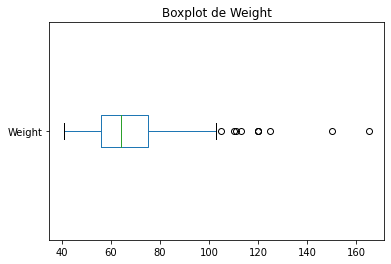

In [35]:
# Realizamos el boxplot de 'weight'
response_df['Weight'].plot(kind='box',
                      title='Boxplot de Weight',
                      vert=False);

Se confirma la presencia de outliers superiores en la variable `Weight`. Se procederá a eliminarlos del dataframe.

In [36]:
# Primero se obtienen las observaciones que efectivamente son
# outliers

# Se calculan los cuartiles 1 y 3 de la variable 'Weight'
percentile_25 = response_df['Weight'].quantile(0.25)
percentile_75 = response_df['Weight'].quantile(0.75)

# Se calcula el rango intercuartil
iqr = percentile_75 - percentile_25

# Se define el límite superior como el cuartil 3 más
# 1.5 veces el rango intercuartil
upper_limit = percentile_75 + 1.5 * iqr

# Se define el límite inferior como el cuartil 1 menos
# 1.5 veces el rango intercuartil
lower_limit = percentile_25 - 1.5 * iqr

# Se filtran los valores debajo del límite inferior
# y los de arriba del límite superior
IQR_outliers = response_df[(response_df['Weight'] < lower_limit) | (response_df['Weight'] > upper_limit)]

# Se imprime el dataframe
IQR_outliers['Weight']

292    120.0
612    110.0
715    111.0
793    120.0
796    113.0
859    125.0
885    165.0
973    120.0
992    150.0
998    105.0
Name: Weight, dtype: float64

In [37]:
# Se obtienen los índices de las observaciones que se desean
# eliminar
indices_a_remover = IQR_outliers['Weight'].index

# Se crea un nuevo dataframe sin los índices que no se desan 
response_df_sin_outliers_weight = response_df.drop(indices_a_remover)
 
# Se le da un vistazo a ese nuevo dataframe
response_df_sin_outliers_weight.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [38]:
# Se obtiene el número de renglones de dicho nuevo dataframe
len(response_df_sin_outliers_weight)

1000

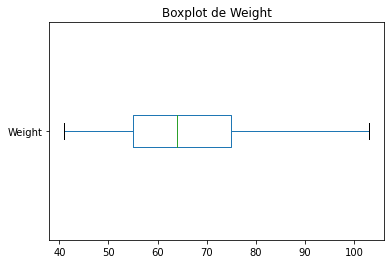

In [39]:
# Realizamos el boxplot de 'Weight' con el nuevo dataframe
response_df_sin_outliers_weight['Weight'].plot(kind='box',
                      title='Boxplot de Weight',
                      vert=False);

Efectivamente ya no se observan outliers :)

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

In [40]:
# Como antes, se obtiene algunas estadísticas descriptivas de la
# variable 'Height'
response_df['Height'].describe()

count    990.000000
mean     173.514141
std       10.024505
min       62.000000
25%      167.000000
50%      173.000000
75%      180.000000
max      203.000000
Name: Height, dtype: float64

Se puede ver que la distancia entre el mínimo y el primer cuartil y la distancia entre el máximo y el tercer cuartil son muy diferentes. La media y la mediana son muy parecidas, por tanto se realizarán histogramas y boxplot para verificar la presencia de outliers.

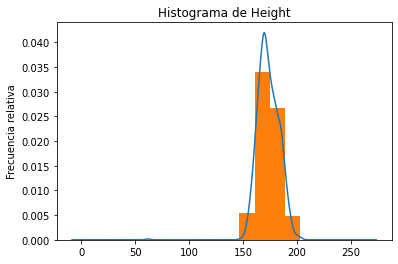

In [41]:
# Hacemos el histograma
fig, ax = plt.subplots()
response_df['Height'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de Height')
response_df['Height'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

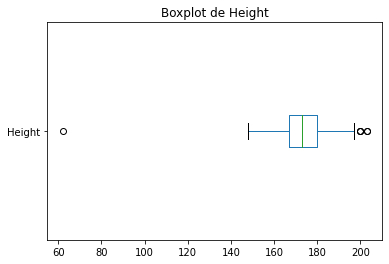

In [42]:
# Realizamos el boxplot de 'Height'
response_df['Height'].plot(kind='box',
                      title='Boxplot de Height',
                      vert=False);

Se confirma la presencia de outliers tanto inferiores como superiores en la variable `Height`. Se procederá a eliminarlos del dataframe.

In [43]:
# Se calculan los cuartiles 1 y 3 de la variable 'Height'
percentile_25 = response_df['Height'].quantile(0.25)
percentile_75 = response_df['Height'].quantile(0.75)

# Se calcula el rango intercuartil
iqr = percentile_75 - percentile_25

# Se define el límite superior como el cuartil 3 más
# 1.5 veces el rango intercuartil
upper_limit = percentile_75 + 1.5 * iqr

# Se define el límite inferior como el cuartil 1 menos
# 1.5 veces el rango intercuartil
lower_limit = percentile_25 - 1.5 * iqr

# Se filtran los valores debajo del límite inferior
# y los de arriba del límite superior
IQR_outliers = response_df[(response_df['Height'] < lower_limit) | (response_df['Height'] > upper_limit)]

# Se imprime el dataframe
IQR_outliers['Height']

97     200.0
220    200.0
547    203.0
676     62.0
799    203.0
992    200.0
Name: Height, dtype: float64

In [44]:
# Primero se obtienen las observaciones que efectivamente son
# outliers

# Se obtienen los índices de las observaciones que se desean
# eliminar
indices_a_remover = IQR_outliers['Height'].index

# Se crea un nuevo dataframe sin los índices que no se desan 
response_df_sin_outliers_height = response_df.drop(indices_a_remover)
 
# Se le da un vistazo a ese nuevo dataframe
response_df_sin_outliers_height.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [45]:
# Se obtiene el número de renglones de dicho nuevo dataframe
len(response_df_sin_outliers_height)

1004

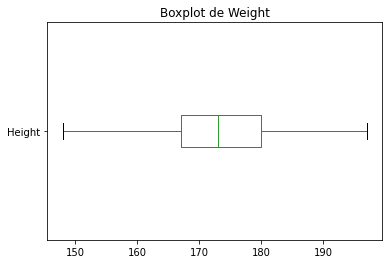

In [46]:
# Realizamos el boxplot de 'Height' con el nuevo dataframe
response_df_sin_outliers_height['Height'].plot(kind='box',
                      title='Boxplot de Weight',
                      vert=False);

Efectivamente ya no se observan outliers :)

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [47]:
# Se crea una nueva columna con la altura en metros
response_df['Height_m'] = response_df['Height'] / 100

# Se le da un vistazo a los primeros renglones del dataframe
response_df['Height_m'].head()

0    1.63
1    1.63
2    1.76
3    1.72
4    1.70
Name: Height_m, dtype: float64

In [48]:
# Se crea una nueva columna con la fórmula proporcionada para el BMI
response_df['BMI'] = response_df['Weight']/(response_df['Height_m']**2)

# Se le da un vistazo a los primeros renglones del dataframe
response_df['BMI'].head()

0    18.066167
1    21.829952
2    21.629649
3    19.943213
4    20.415225
Name: BMI, dtype: float64

In [49]:
# Como antes, se obtienen algunos descriptivos de la variable
response_df['BMI'].describe()

count    990.000000
mean      21.967480
std        4.923607
min       15.495868
25%       19.591837
50%       21.453430
75%       23.694435
max      143.080125
Name: BMI, dtype: float64

Se puede ver que la distancia entre el mínimo y el primer cuartil y la distancia entre el máximo y el tercer cuartil son muy diferentes. Por tanto se realizarán histogramas y boxplot para verificar la presencia de outliers.

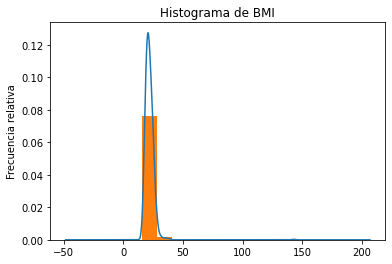

In [50]:
# Hacemos un histograma
fig, ax = plt.subplots()
response_df['BMI'].plot.kde(ax=ax,
                          legend=False,
                          title='Histograma de BMI')
response_df['BMI'].plot.hist(density=True, ax=ax)
ax.set_ylabel('Frecuencia relativa');

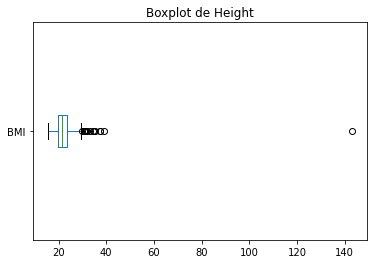

In [51]:
# Realizamos el boxplot de 'BMI'
response_df['BMI'].plot(kind='box',
                      title='Boxplot de Height',
                      vert=False);

Se confirma la presencia de outliers superiores en la variable `BMI`. Se procederá a mostrar cuáles son éstos

In [52]:
# Se calculan los cuartiles 1 y 3 de la variable 'BMI'
percentile_25 = response_df['BMI'].quantile(0.25)
percentile_75 = response_df['BMI'].quantile(0.75)

# Se calcula el rango intercuartil
iqr = percentile_75 - percentile_25

# Se define el límite superior como el cuartil 3 más
# 1.5 veces el rango intercuartil
upper_limit = percentile_75 + 1.5 * iqr

# Se define el límite inferior como el cuartil 1 menos
# 1.5 veces el rango intercuartil
lower_limit = percentile_25 - 1.5 * iqr

# Se filtran los valores debajo del límite inferior
# y los de arriba del límite superior
IQR_outliers = response_df[(response_df['BMI'] < lower_limit) | (response_df['BMI'] > upper_limit)]

# Se imprime el dataframe
IQR_outliers[['Weight', 'Height', 'BMI']]

,Weight,Height,BMI
42,90.0,170.0,31.141869
151,100.0,180.0,30.864198
156,97.0,177.0,30.961729
292,120.0,184.0,35.444234
357,96.0,179.0,29.961612
401,90.0,170.0,31.141869
612,110.0,172.0,37.182261
636,93.0,171.0,31.804658
676,55.0,62.0,143.080125
715,111.0,183.0,33.145212


Con los tres métodos, se puede confirmar la presencia de outliers en la variable `BMI`

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

Primero se obtendrá un listado de las variables que efectivamente son de tipo string:

In [53]:
df_columnas[df_columnas['tipo'] == 'object']

,variable,tipo
73,Smoking,object
74,Alcohol,object
107,Punctuality,object
108,Lying,object
132,Internet usage,object
144,Gender,object
145,Left - right handed,object
146,Education,object
147,Only child,object
148,Village - town,object


Se procederá a crear boxplots de la variable 'BMI' con respecto a las categorías de cada una de las variables en la tabla anterior

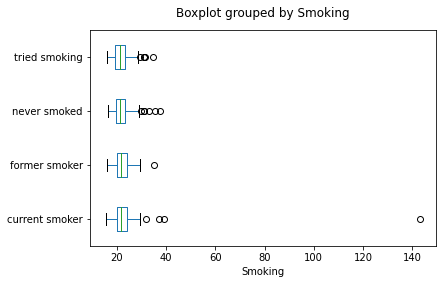

In [54]:
# Boxplots con respecto a las categorías de la variable
# 'Smorking'
graf = response_df.boxplot(by = 'Smoking',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

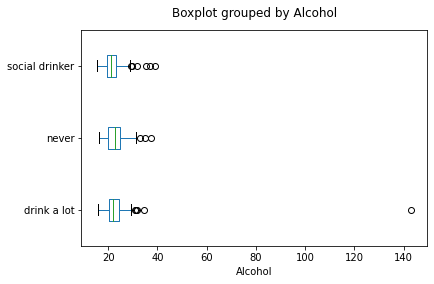

In [55]:
# Boxplots con respecto a las categorías de la variable
# 'Alcohol'
graf = response_df.boxplot(by = 'Alcohol',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

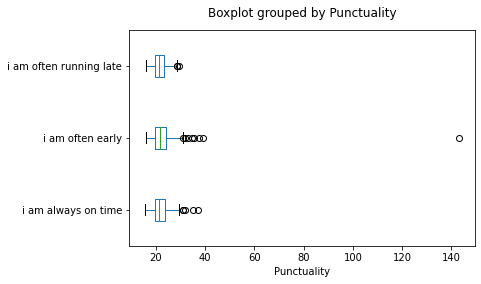

In [56]:
# Boxplots con respecto a las categorías de la variable
# 'Punctuality'
graf = response_df.boxplot(by = 'Punctuality',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

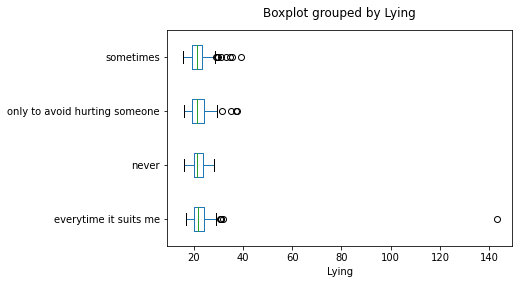

In [57]:
# Boxplots con respecto a las categorías de la variable
# 'Lying'
graf = response_df.boxplot(by = 'Lying',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

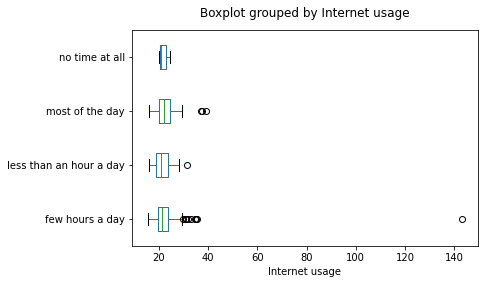

In [58]:
# Boxplots con respecto a las categorías de la variable
# 'Internet usage'
graf = response_df.boxplot(by = 'Internet usage',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

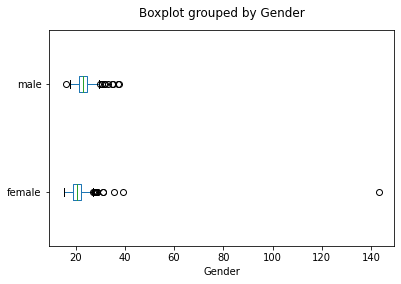

In [59]:
# Boxplots con respecto a las categorías de la variable
# 'Gender'
graf = response_df.boxplot(by = 'Gender',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

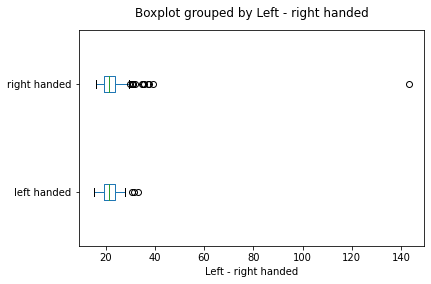

In [60]:
# Boxplots con respecto a las categorías de la variable
# 'Left - right handed'
graf = response_df.boxplot(by = 'Left - right handed',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

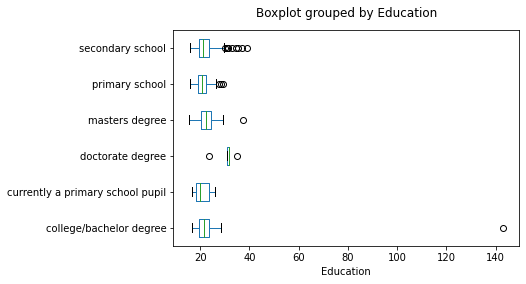

In [61]:
# Boxplots con respecto a las categorías de la variable
# 'Education'
graf = response_df.boxplot(by = 'Education',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

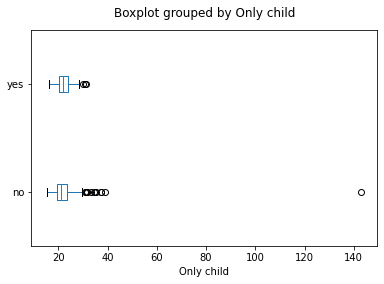

In [62]:
# Boxplots con respecto a las categorías de la variable
# 'Only child'
graf = response_df.boxplot(by = 'Only child',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

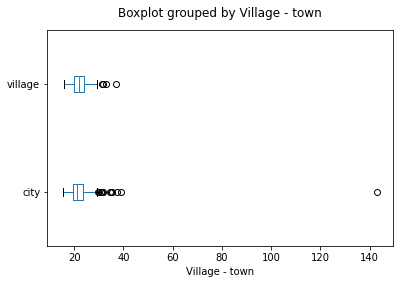

In [63]:
# Boxplots con respecto a las categorías de la variable
# 'Village - town'
graf = response_df.boxplot(by = 'Village - town',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

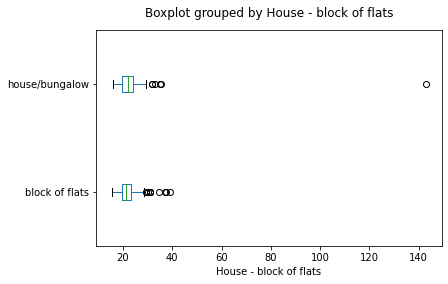

In [64]:
# Boxplots con respecto a las categorías de la variable
# 'House - block of flats'
graf = response_df.boxplot(by = 'House - block of flats',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

Como los outliers derechos dificultan la compresión de las visualizaciones, se quitarán. Sólo se considerarán las observaciones que son menores al cuantil al 97.5%; y con dichas visualizaciones se intentará hacer algunas afirmaciones

In [65]:
# Se calcula el cuantil al 97.5% de la variable 'BMI'
cuantil_95 = response_df['BMI'].quantile(0.975)
cuantil_95

# Se filtran las observaciones que son menores al cuantil al 97.5%
response_df95 = response_df[(response_df['BMI'] <= cuantil_95)]

In [66]:
# Se verifica el número de renglones
len(response_df95)

965

In [67]:
# Se le da un vistazo al dataframe filtrado
response_df95.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats,Height_m,BMI
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats,1.63,18.066167
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats,1.63,21.829952
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,67.0,2.0,female,right handed,secondary school,no,city,block of flats,1.76,21.629649
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow,1.72,19.943213
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow,1.70,20.415225


In [68]:
sns.set(style = 'whitegrid')

### BMI con respecto a la variable 'Smoking'

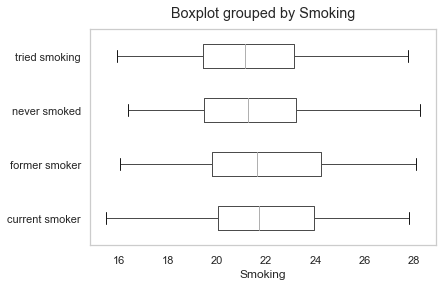

In [69]:
# Boxplots con respecto a las categorías de la variable
# 'Smoking'
graf = response_df95.boxplot(by = 'Smoking',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

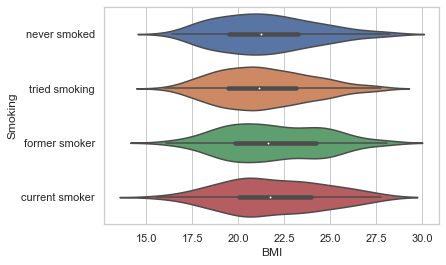

In [70]:
# Violinplots con respecto a las categorías de la variable
# 'Smoking'
sns.violinplot(y = 'Smoking', x = 'BMI',
              data = response_df95);

Se puede observar una muy ligera diferencia en el BMI medio de aquellos que se consideran/consideraron fumadores y los que consideran/consideraron NO fumadores 

### BMI con respecto a la variable 'Alcohol'

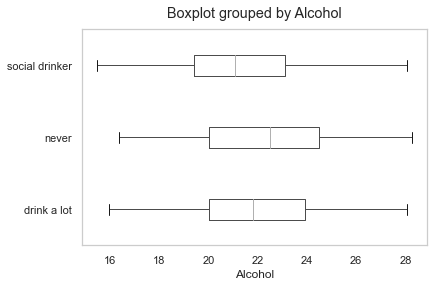

In [71]:
# Boxplots con respecto a las categorías de la variable
# 'Alcohol'
graf = response_df95.boxplot(by = 'Alcohol',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

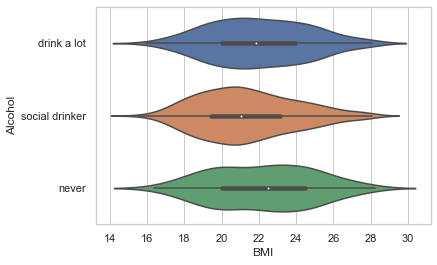

In [72]:
# Violinplots con respecto a las categorías de la variable
# 'Alcohol'
sns.violinplot(y = 'Alcohol', x = 'BMI',
              data = response_df95);

Se puede observar una ligera diferencia en el BMI medio de aquellos que se consideran/consideraron bebedores y los que consideran/consideraron NO bebedores. Esta tentativa relación, nos lleva a profundizar el análisis de este fenómeno. OJO: Podría llevarnos a pensar que beber disminuye el BMI pero no necesariamente es cierto.

### BMI con respecto a la variable 'Punctuality'

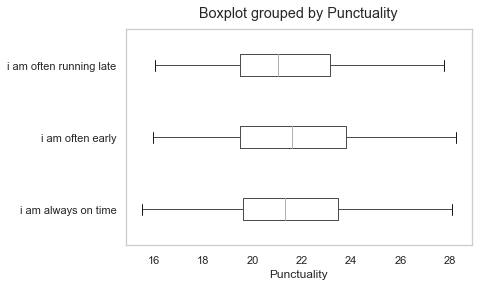

In [73]:
# Boxplots con respecto a las categorías de la variable
# 'Punctuality'
graf = response_df95.boxplot(by = 'Punctuality',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

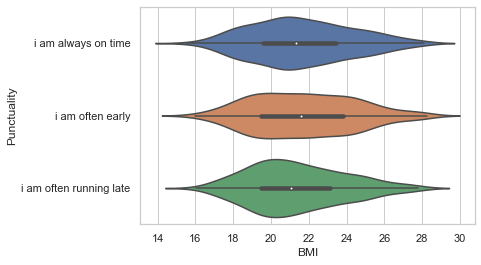

In [74]:
# Violinplots con respecto a las categorías de la variable
# 'Punctuality'
sns.violinplot(y = 'Punctuality', x = 'BMI',
              data = response_df95);

Se puede observar una muy ligera diferencia en el BMI medio de aquellos que frecuentemente llegan tarde y los que no. OJO: Podría llevarnos a pensar que llegar tarde disminuye el BMI pero no necesariamente es cierto, es un ejemplo clásico de falacia estadística

### BMI con respecto a la variable 'Lying'

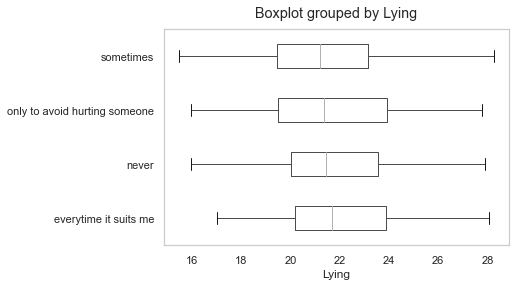

In [75]:
# Boxplots con respecto a las categorías de la variable
# 'Lying'
graf = response_df95.boxplot(by = 'Lying',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

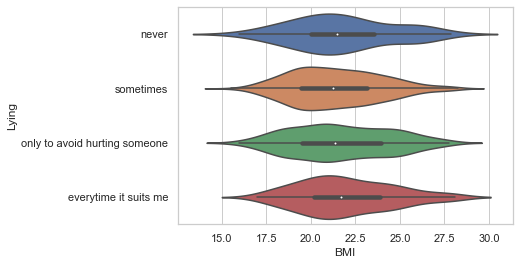

In [76]:
# Violinplots con respecto a las categorías de la variable
# 'Lying'
sns.violinplot(y = 'Lying', x = 'BMI',
              data = response_df95);

No se muestran diferencias aparentes entre las variables

### BMI con respecto a la variable 'Internet usage'

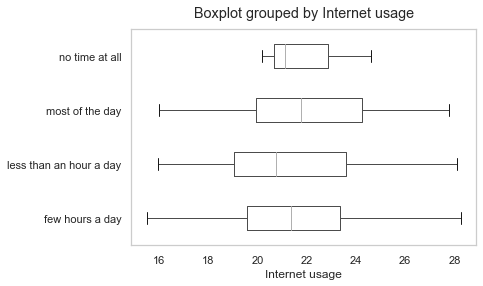

In [77]:
# Boxplots con respecto a las categorías de la variable
# 'Internet usage'
graf = response_df95.boxplot(by = 'Internet usage',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

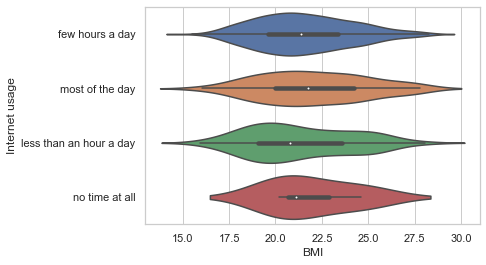

In [78]:
# Violinplots con respecto a las categorías de la variable
# 'Internet usage'
sns.violinplot(y = 'Internet usage', x = 'BMI',
              data = response_df95);

Se puede observar una ligera diferencia en el BMI medio de aquellos que se consideran/consideraron usuarios sostenibles de internet y los que no. Esta tentativa relación, nos lleva a profundizar el análisis de este fenómeno. OJO: Podría llevarnos a pensar que realizar actividades con internet ó computadoras sosteniblemente aumenta el BMI, pero no necesariamente es cierto.

### BMI con respecto a la variable 'Gender'

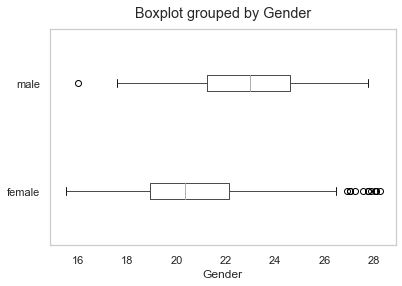

In [79]:
# Boxplots con respecto a las categorías de la variable
# 'Gender'
graf = response_df95.boxplot(by = 'Gender',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

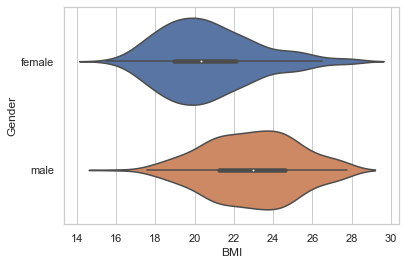

In [80]:
# Violinplots con respecto a las categorías de la variable
# 'Gender'
sns.violinplot(y = 'Gender', x = 'BMI',
              data = response_df95);

Esta es una relación que merece la pena ser analizada con profundidad, pues tanto las medias como las formas de las densidades del BMI para hombres y para mujeres son muy diferentes. Llevándonos a querer afirmar que los hombres tienen mayor BMI que las mujeres

### BMI con respecto a la variable 'Left - right handed'

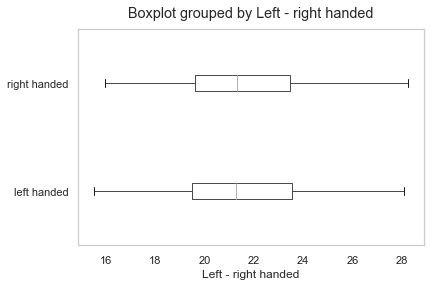

In [81]:
# Boxplots con respecto a las categorías de la variable
# 'Left - right handed'
graf = response_df95.boxplot(by = 'Left - right handed',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

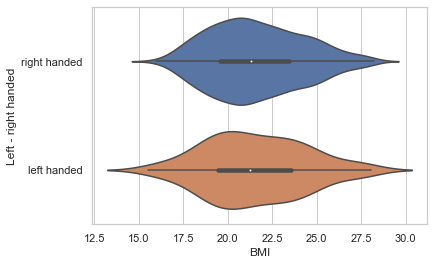

In [82]:
# Violinplots con respecto a las categorías de la variable
# 'Left - right handed'
sns.violinplot(y = 'Left - right handed', x = 'BMI',
              data = response_df95);

No se muestran diferencias aparentes entre las variables. Hecho que hace sentido pues la mano con la que escribimos no tiene que ver con nuestra complexión física

### BMI con respecto a la variable 'Education'

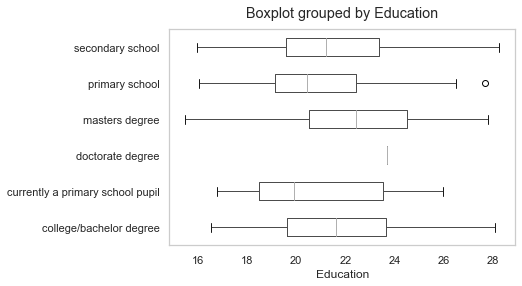

In [83]:
# Boxplots con respecto a las categorías de la variable
# 'Education'
graf = response_df95.boxplot(by = 'Education',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

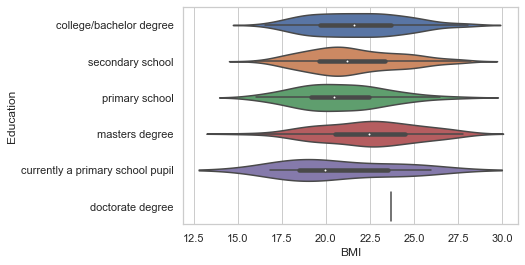

In [84]:
# Violinplots con respecto a las categorías de la variable
# 'Education'
sns.violinplot(y = 'Education', x = 'BMI',
              data = response_df95);

Se puede observar un cambio en la forma de las densidades como en los valores medios de la variable BMI para los diferentes grados educativos. Podría parecer que a mayor grado educativo se tiene un mayor BMI, hecho que podría ser cuestionable, por tanto vale la pena profundizar el análisis en este fenómeno.

### BMI con respecto a la variable 'Only child'

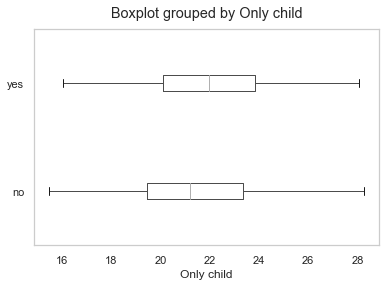

In [85]:
# Boxplots con respecto a las categorías de la variable
# 'Only child'
graf = response_df95.boxplot(by = 'Only child',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

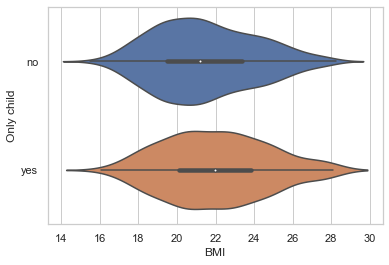

In [86]:
# Violinplots con respecto a las categorías de la variable
# 'Only child'
sns.violinplot(y = 'Only child', x = 'BMI',
              data = response_df95);

Se puede observar una ligera diferencia para ambas categorías en los BMIs medios, que valdría la pena profundizar en una relación tentativa.

### BMI con respecto a la variable 'Village - town'

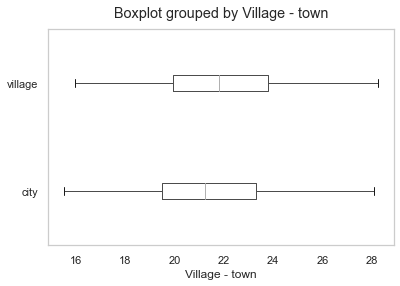

In [87]:
# Boxplots con respecto a las categorías de la variable
# 'Village - town'
graf = response_df95.boxplot(by = 'Village - town',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

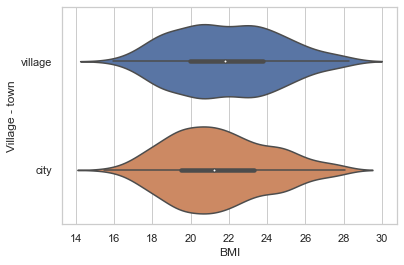

In [88]:
# Violinplots con respecto a las categorías de la variable
# 'Village - town'
sns.violinplot(y = 'Village - town', x = 'BMI',
              data = response_df95);

Se puede observar una ligera diferencia para ambas categorías en los BMIs medios, que valdría la pena profundizar en una relación tentativa. Pues es intuitivo que el nivel de actividad física en ambos entornos (ciudad y no-ciudad) es diferente y por tanto posiblemente incidir en el BMI.

### BMI con respecto a la variable 'House - block of flats'

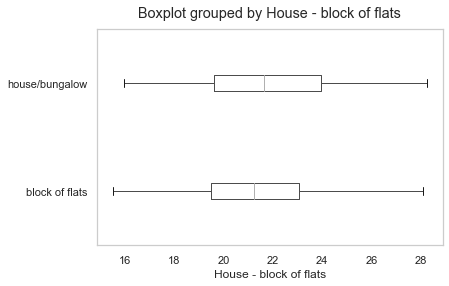

In [89]:
# Boxplots con respecto a las categorías de la variable
# 'House - block of flats'
graf = response_df95.boxplot(by = 'House - block of flats',
                           column = ['BMI'],
                           grid = False, vert=False)

# Axis details
graf.set_title(" ");

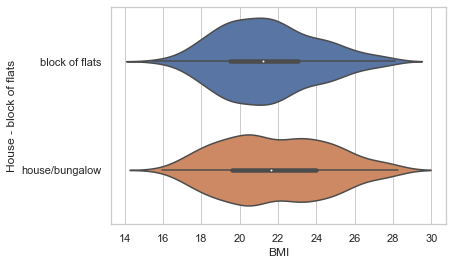

In [90]:
# Violinplots con respecto a las categorías de la variable
# 'House - block of flats'
sns.violinplot(y = 'House - block of flats', x = 'BMI',
              data = response_df95);

No se muestran diferencias aparentes entre las variables.

**Observación final:** En general, excepto por el género y el nivel educativo, las variables que muestran ligeras diferencias, se debe hacer un análisis más profundo para verificar formalmente la existencia ó no existencia de relación.